In [1]:
import sys
import os
from os.path import join

project_root = os.path.dirname(os.path.abspath('..')) 

if project_root not in sys.path:
    sys.path.append(project_root)

from src.NeuralNetwork import NeuralNetwork
from src.layers import ConvolutionalLayer
from data.MnistDataloader import MnistDataloader
import numpy as np
import random
import matplotlib.pyplot as plt

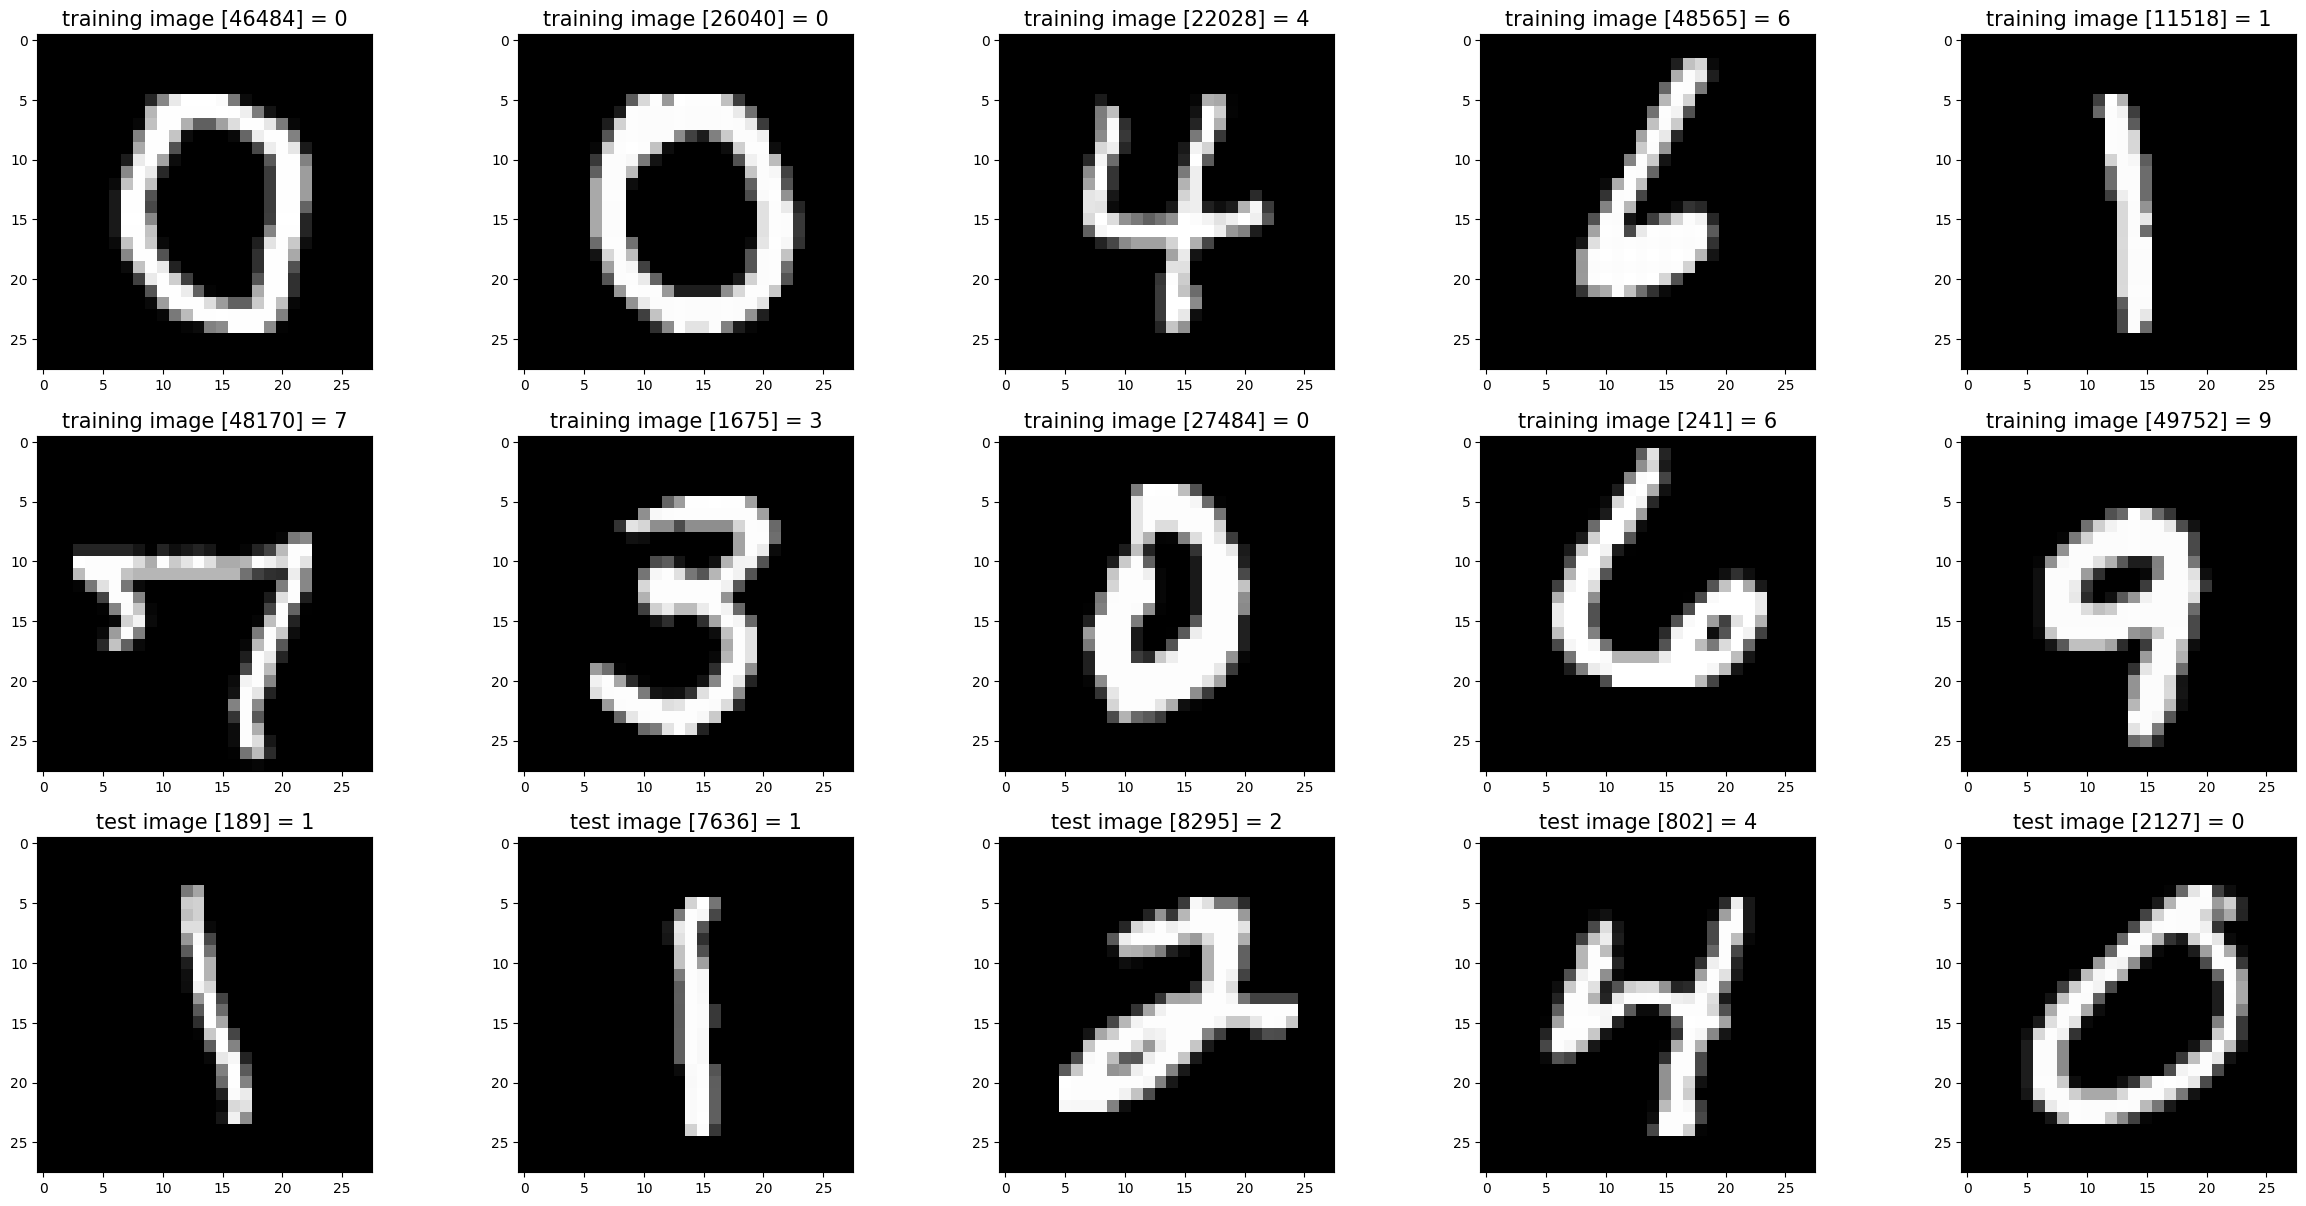

In [2]:
input_path = '../../data/input'
training_images_filepath = join(input_path, '../../data/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, '../../data/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, '../../data/mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, '../../data/mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [3]:
image = np.array(images_2_show)
image.shape

(15, 28, 28)

In [4]:
image_batch = np.array([
  image,
  image,
  image,
  image,
  image
])

In [5]:
image_batch.shape

(5, 15, 28, 28)

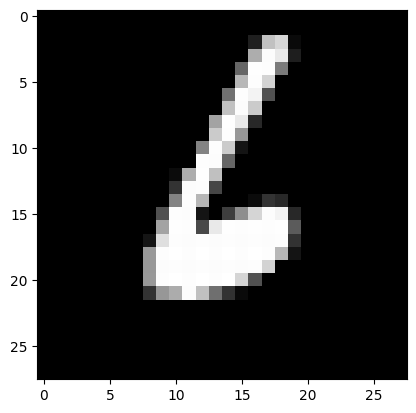

In [6]:
plt.imshow(image_batch[0][3], cmap=plt.cm.gray)

In [7]:
X_train = np.random.normal(size=(3, 5, 3, 3))

In [8]:
layers = [
  ConvolutionalLayer(
    name = "Convolution 1",
    activation_name = "relu",
    output_channels_dim=3,
  ),
  ConvolutionalLayer(
    name = "Convolution 1",
    activation_name = "relu",
    output_channels_dim=3,
  ),
  ConvolutionalLayer(
    name = "Convolution 1",
    activation_name = "relu",
    output_channels_dim=3,
  )
]

In [9]:
nn = NeuralNetwork(
  layers = layers,
  loss_type="mse",
  optimizer_type="adam",
  seed=1
)

In [10]:
nn.build(X_train.shape[1])

In [11]:
y_hat = nn.forward_pass(X_train)

In [21]:
y_hat.shape

(3, 3, 3, 3)

In [22]:
y_true = y_hat * 2 - 5

nn.backward_pass(y_true, y_hat)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 3)